## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from google.colab import drive

In [0]:
import shutil
path1 = '/content/train'
path2 = '/content/test'
path3 = '/content/val'
shutil.rmtree(path1)
shutil.rmtree(path2)
shutil.rmtree(path3)

In [7]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/AIML Project/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [13]:
import pandas as pd
labels=pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [14]:
labels.shape

(10222, 2)

### Print the count of each category of Dogs given in the dataset



In [15]:
labels.groupby('breed').count()

,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
...,...
welsh_springer_spaniel,79
west_highland_white_terrier,81
whippet,95


### Get one-hot encodings of labels

In [0]:
import numpy as np
target=pd.Series(labels['breed'])
onehot=pd.get_dummies(target,sparse=True)
onehot_target=np.asarray(onehot)

In [17]:
onehot_target[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
from tqdm import tqdm
import cv2
x_features=[]
y_features=[]

In [19]:
labels.values

array([['000bec180eb18c7604dcecc8fe0dba07', 'boston_bull'],
       ['001513dfcb2ffafc82cccf4d8bbaba97', 'dingo'],
       ['001cdf01b096e06d78e9e5112d419397', 'pekinese'],
       ...,
       ['ffe2ca6c940cddfee68fa3cc6c63213f', 'airedale'],
       ['ffe5f6d8e2bff356e9482a80a6e29aac', 'miniature_pinscher'],
       ['fff43b07992508bc822f33d8ffd902ae', 'chesapeake_bay_retriever']],
      dtype=object)

In [20]:

for iid,lab in tqdm(labels.values):
  train_img=cv2.imread('./train/{}.jpg'.format(iid),1)
  train_img_resize=cv2.resize(train_img,(128,128))
  x_features.append(train_img_resize)
  y_features.append(lab)

100%|██████████| 10222/10222 [00:27<00:00, 367.12it/s]


'boston_bull'

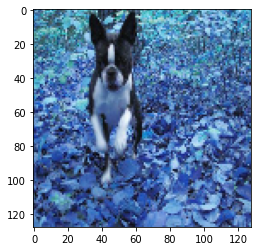

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_features[0])
y_features[0]

In [22]:
x_features[0].shape,y_features[0]

((128, 128, 3), 'boston_bull')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain = le.fit_transform(y_features)
ytrain

array([19, 37, 85, ...,  3, 75, 28])

In [0]:
import tensorflow 
y_train_data = tensorflow.keras.utils.to_categorical(ytrain, 120)

In [25]:
y_train_data.shape,y_train_data[0]

((10222, 120),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.], dtype=float32))

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [26]:
import numpy  
xtrain_arr = numpy.array(x_features) 
xtrain_arr.shape,xtrain_arr[0].shape

((10222, 128, 128, 3), (128, 128, 3))

In [27]:
x_train_data = xtrain_arr.astype('float32')

#Normalizing the input
x_train_data /= 255.0
print('x_train_data shape:', x_train_data.shape)
print(x_train_data.shape[0], 'train samples')

x_train_data shape: (10222, 128, 128, 3)
10222 train samples


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.10, random_state=2)

In [29]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((9199, 128, 128, 3), (9199, 120), (1023, 128, 128, 3), (1023, 120))

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img=pd.read_csv('sample_submission.csv',usecols=['id'])  

In [31]:
test_img.head()

,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e


In [32]:
test_img.values

array([['000621fb3cbb32d8935728e48679680e'],
       ['00102ee9d8eb90812350685311fe5890'],
       ['0012a730dfa437f5f3613fb75efcd4ce'],
       ...,
       ['fff74b59b758bbbf13a5793182a9bbe4'],
       ['fff7d50d848e8014ac1e9172dc6762a3'],
       ['fffbff22c1f51e3dc80c4bf04089545b']], dtype=object)

(<matplotlib.image.AxesImage at 0x7f528694e080>, (332, 500, 3))

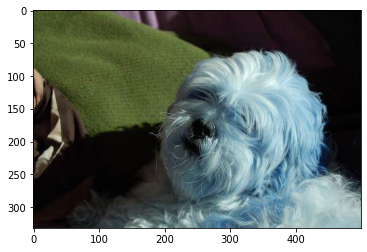

In [33]:
img1 = cv2.imread('./test/{}.jpg'.format('fff7d50d848e8014ac1e9172dc6762a3'), 1)
plt.imshow(img1),img1.shape

(<matplotlib.image.AxesImage at 0x7f52868a9668>, (128, 128, 3))

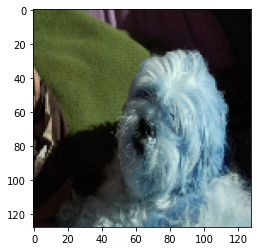

In [34]:
img_rsz = cv2.resize(img1, (128, 128)) 
plt.imshow(img_rsz), img_rsz.shape

In [35]:
test_img

,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e
...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8
10353,fff1ec9e6e413275984966f745a313b0
10354,fff74b59b758bbbf13a5793182a9bbe4
10355,fff7d50d848e8014ac1e9172dc6762a3


Run the below code to load the test image files in x_test_feature

In [36]:
from tqdm import tqdm
import cv2
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img['id']):
  img = cv2.imread('./test/{}.jpg'.format(f), 1)
  img_resize = cv2.resize(img, (128, 128)) 
  x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:27<00:00, 377.92it/s]


In [37]:
x_test_feature[0].shape

(128, 128, 3)

Normalize the test data and convert it into 4 dimensions

In [38]:
import numpy  
xtest_arr = numpy.array(x_test_feature) 
xtest_arr.shape,xtest_arr[0].shape

((10357, 128, 128, 3), (128, 128, 3))

In [39]:
x_test_data = xtest_arr.astype('float32')

#Normalizing the input
x_test_data /= 255.0
print('x_test_data shape:', x_test_data.shape)
print(x_test_data.shape[0], 'test samples')

x_test_data shape: (10357, 128, 128, 3)
10357 test samples


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 5X5 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(128,128,3),name='conv_1'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))

#Apply Dropout with 0.25 probability 
#model.add(Dropout(0.25,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 256 units and activation function as 'ReLU'
model.add(Dense(256, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
#model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 120 units and activation function as 'softmax'
model.add(Dense(120, activation='softmax',name='dense_2'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [43]:
#Training on the dataset
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/10
72/72 [==============================] - 5s 74ms/step - loss: 4.8708 - accuracy: 0.0110 - val_loss: 4.7750 - val_accuracy: 0.0166
Epoch 2/10
72/72 [==============================] - 5s 63ms/step - loss: 4.6704 - accuracy: 0.0251 - val_loss: 4.5518 - val_accuracy: 0.0166
Epoch 3/10
72/72 [==============================] - 5s 64ms/step - loss: 4.3165 - accuracy: 0.0617 - val_loss: 4.4045 - val_accuracy: 0.0479
Epoch 4/10
72/72 [==============================] - 5s 64ms/step - loss: 3.7983 - accuracy: 0.1424 - val_loss: 4.4485 - val_accuracy: 0.0538
Epoch 5/10
72/72 [==============================] - 5s 64ms/step - loss: 2.8840 - accuracy: 0.3164 - val_loss: 5.0603 - val_accuracy: 0.0518
Epoch 6/10
72/72 [==============================] - 5s 65ms/step - loss: 1.6915 - accuracy: 0.5858 - val_loss: 6.4335 - val_accuracy: 0.0499
Epoch 7/10
72/72 [==============================] - 5s 65ms/step - loss: 0.7388 - accuracy: 0.8186 - val_loss: 8.3227 - val_accuracy: 0.0479
Epoch 8/10
72

In [44]:
score = model.evaluate(x_val, y_val)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

32/32 [==============================] - 0s 11ms/step - loss: 11.9268 - accuracy: 0.0479
Val loss: 11.926837921142578
Val accuracy: 0.04789833724498749


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array

In [0]:
datagen = ImageDataGenerator(rotation_range=45,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.25,
                             horizontal_flip=True,
                             fill_mode='nearest')

(<matplotlib.image.AxesImage at 0x7f521514f2e8>, (128, 128, 3))

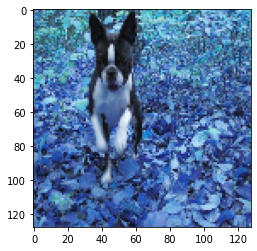

In [47]:
plt.imshow(x_train_data[0]),x_train_data[0].shape

In [48]:
#x=img_to_array(img)
x=x_train_data[0].reshape((1,)+x_train_data[0].shape)
print(x.shape)

(1, 128, 128, 3)


In [0]:
i=0
for batch in datagen.flow(x,batch_size=1,save_to_dir='preview',save_prefix='dog',save_format='jpeg'):
  i+=1
  if i > 5:
    break

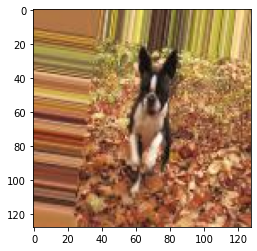

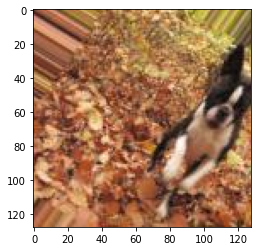

In [50]:
img = cv2.imread('./preview/{}.jpeg'.format('dog_0_1202'), 1)
plt.imshow(img),img.shape
plt.show()

img = cv2.imread('./preview/{}.jpeg'.format('dog_0_1420'), 1)
plt.imshow(img),img.shape
plt.show()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [51]:
df = labels.groupby('breed').agg({'id':['count']})
df.head()

,id
,count
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74


In [52]:
classes = labels.breed.unique()
classes

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [0]:
from sklearn.model_selection import train_test_split
train_labels , val_labels = train_test_split(labels, test_size = 0.2,random_state=5)

In [54]:
train_classes = train_labels.breed.unique()
val_classes = val_labels.breed.unique()
train_classes.shape,val_classes.shape

((120,), (120,))

Build 120 Subfolders with class names

In [0]:
import os
import shutil

os.mkdir('./val')

for subfolder in train_classes:
  os.mkdir('./train/{}'.format(subfolder))

for subfolder in val_classes:
  os.mkdir('./val/{}'.format(subfolder))

Copy train data into train and val folders

In [0]:
for iid,lab in (train_labels.values):
      shutil.move('./train/{}.jpg'.format(iid), './train/{}/'.format(lab)) 

for iid,lab in (val_labels.values):
      shutil.move('./train/{}.jpg'.format(iid), './val/{}/'.format(lab)) 

In [57]:
from glob import glob
train_folders = glob('./train/*')
print(len(train_folders))

120


In [58]:
from glob import glob
val_folders = glob('./val/*')
print(len(val_folders))

120


In [59]:
from glob import glob
test_folders = glob('./test/*')
print(len(test_folders))

10357


In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [61]:
train_generator = train_datagen.flow_from_directory('./train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8177 images belonging to 120 classes.


In [62]:
val_generator  =  val_datagen.flow_from_directory('./val/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2045 images belonging to 120 classes.


### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [63]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=val_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(val_generator)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
256/256 [==============================] - 70s 272ms/step - loss: 4.7988 - accuracy: 0.0278 - val_loss: 4.4449 - val_accuracy: 0.0567
Epoch 2/10
256/256 [==============================] - 58s 226ms/step - loss: 4.4738 - accuracy: 0.0572 - val_loss: 4.2250 - val_accuracy: 0.0753
Epoch 3/10
256/256 [==============================] - 58s 226ms/step - loss: 4.2178 - accuracy: 0.0912 - val_loss: 4.1316 - val_accuracy: 0.0958
Epoch 4/10
256/256 [==============================] - 58s 228ms/step - loss: 4.0068 - accuracy: 0.1331 - val_loss: 4.1810 - val_accuracy: 0.0822
Epoch 5/10
256/256 [==============================] - 58s 226ms/step - loss: 3.7716 - accuracy: 0.1757 - val_loss: 4.2375 - val_accuracy: 0.0905
Epoch 6/10
256/256 [==============================] - 58s 227ms/step - loss: 3.5428 - accuracy: 0.2212 - val_loss: 4.2781 - val_accuracy: 0.0890
Epoch 7/10
256/256 [==============================] - 

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
proj_path = '/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
#base_model= VGG16(weights=(proj_path),include_top=False, pooling='avg',input_shape=(128, 128,3))
base_model= VGG16(weights='imagenet',include_top=False, pooling='max',input_shape=(128, 128,3))
#base_model= VGG16(weights='imagenet',include_top=False, pooling='avg',input_shape=(128, 128,3))

In [0]:
#from tensorflow.keras.applications.resnet50 import ResNet50
# Instantiate the model with the pre-trained weights (no top)
#base_model= ResNet50(weights='imagenet',include_top=False, pooling='avg',input_shape=(128, 128,3))

Print the summary of the base_model

In [94]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
# layers  
x = base_model.output
#x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
#x = Dense(4096, activation='relu')(x)
#x = Dense(2048, activation='relu')(x)
#x = Dense(1024, activation='relu')(x)
#x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
#x = Dropout(0.5)(x)
prediction = Dense(120, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [96]:
base_model.layers

In [0]:
# don't train existing weights
for layer in base_model.layers:
  layer.trainable = False

In [0]:
#base_model.layers[0].trainable = False
#base_model.layers[1].trainable = False
#base_model.layers[2].trainable = False
#base_model.layers[3].trainable = False
#base_model.layers[4].trainable = False
#base_model.layers[5].trainable = False
#base_model.layers[6].trainable = False
#base_model.layers[7].trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [99]:
# view the structure of the model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.summary()

#optimizer = Adam(lr=0.00001)
# tell the model what cost and optimization method to use
#optimizer = RMSprop(lr=0.001, rho=0.9)
#model.compile(optimizer=optimizer,
#              loss='categorical_crossentropy',
#              metrics=["accuracy"])
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [100]:
#Training on the dataset
model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/20
144/144 [==============================] - 21s 144ms/step - loss: 4.5941 - accuracy: 0.0412 - val_loss: 4.2444 - val_accuracy: 0.0831
Epoch 2/20
144/144 [==============================] - 16s 114ms/step - loss: 3.7999 - accuracy: 0.1488 - val_loss: 3.7174 - val_accuracy: 0.1711
Epoch 3/20
144/144 [==============================] - 16s 112ms/step - loss: 3.3021 - accuracy: 0.2286 - val_loss: 3.4646 - val_accuracy: 0.2004
Epoch 4/20
144/144 [==============================] - 16s 111ms/step - loss: 3.0067 - accuracy: 0.2783 - val_loss: 3.3638 - val_accuracy: 0.2151
Epoch 5/20
144/144 [==============================] - 16s 111ms/step - loss: 2.8060 - accuracy: 0.3195 - val_loss: 3.3116 - val_accuracy: 0.2317
Epoch 6/20
144/144 [==============================] - 16s 111ms/step - loss: 2.6318 - accuracy: 0.3582 - val_loss: 3.2394 - val_accuracy: 0.2131
Epoch 7/20
144/144 [==============================] - 16s 112ms/step - loss: 2.4984 - accuracy: 0.3890 - val_loss: 3.1977 - val_ac

In [101]:
#Training on the dataset
model.fit(x_train, y_train,
          batch_size=64,
          epochs=40,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/40
144/144 [==============================] - 16s 111ms/step - loss: 1.3117 - accuracy: 0.6819 - val_loss: 3.5303 - val_accuracy: 0.2239
Epoch 2/40
144/144 [==============================] - 16s 113ms/step - loss: 1.2461 - accuracy: 0.6983 - val_loss: 3.6049 - val_accuracy: 0.2180
Epoch 3/40
144/144 [==============================] - 16s 112ms/step - loss: 1.1906 - accuracy: 0.7163 - val_loss: 3.6429 - val_accuracy: 0.2317
Epoch 4/40
144/144 [==============================] - 16s 111ms/step - loss: 1.1419 - accuracy: 0.7218 - val_loss: 3.7114 - val_accuracy: 0.2190
Epoch 5/40
144/144 [==============================] - 16s 110ms/step - loss: 1.0766 - accuracy: 0.7473 - val_loss: 3.8276 - val_accuracy: 0.2072
Epoch 6/40
144/144 [==============================] - 16s 111ms/step - loss: 1.0285 - accuracy: 0.7591 - val_loss: 3.8015 - val_accuracy: 0.2131
Epoch 7/40
144/144 [==============================] - 16s 111ms/step - loss: 0.9752 - accuracy: 0.7714 - val_loss: 3.8874 - val_ac